In [44]:
# import required libraries
import scipy.integrate
import sympy

from utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# define notebook parameters
w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]

In [3]:
# returns the equations defined for andronov_hopf bifurcation, given parameter alpha and location (x, y)
def andronov_hopf(alpha_, x_, y_):
    return (alpha_ - x_**2 - y_**2) * x_ - y_, x + (alpha_ - x_**2 - y_**2) * y_

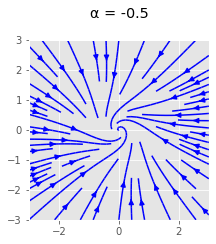

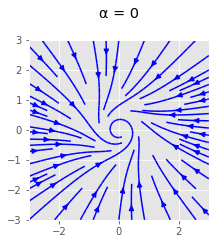

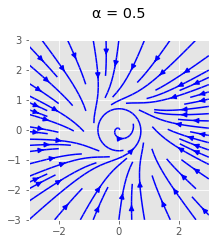

In [4]:
# create a list containing different parameters
alphas = [-0.5, 0, 0.5]

# loop over the three different alpha values and plot them
for alpha in alphas:
    # instead of creating matrix alpha fill the U and V values directly with the given equations
    U, V = andronov_hopf(alpha, X, Y)

    # add parameter value to the title
    title = "\u03B1 = " + str(alpha) + "\n"

    # plot the figure
    fig = plt.figure(figsize=(15, 15))
    gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.streamplot(X, Y, U, V, density=[0.5, 1], color="b")
    ax0.set_title(title)
    ax0.set_aspect(1)

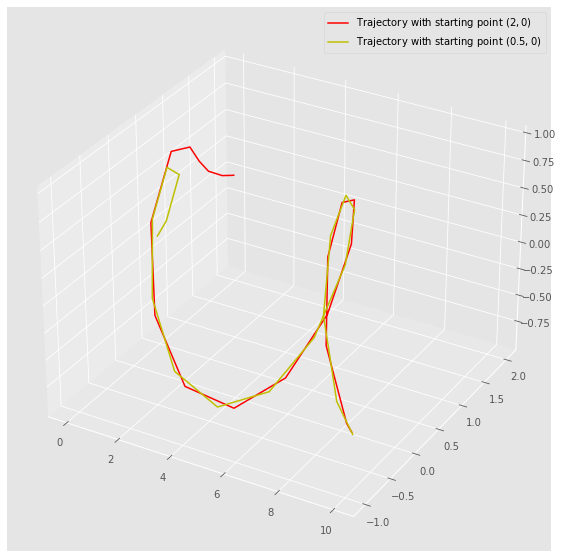

In [8]:
# solve the ODEs w.r.t to time and position
sol = scipy.integrate.solve_ivp(lambda t, y: andronov_hopf(1.0, y[0], y[1]), (0, 10), [2, 0])
sol_ = scipy.integrate.solve_ivp(lambda t, y: andronov_hopf(1.0, y[0], y[1]), (0, 10), [0.5, 0])

# plot both trajectories in 3D
fig = plt.figure(figsize=(10, 10))
ax0 = plt.axes(projection="3d")
ax0.plot(sol.t, sol.y[0], sol.y[1], label=r"Trajectory with starting point $(2, 0)$", color="r")
ax0.plot(sol_.t, sol_.y[0], sol_.y[1], label=r"Trajectory with starting point $(0.5, 0)$", color="y")
ax0.legend()
ax0.set_aspect(aspect="auto")

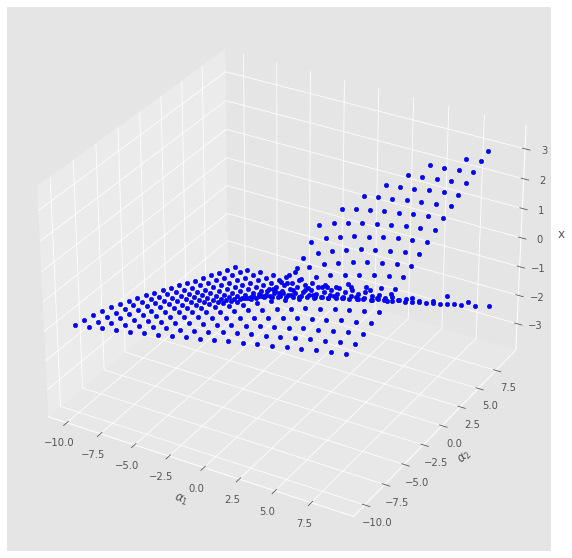

In [56]:
x = sy.symbols("x")
# create sample points (alpha_1, alpha_2)
sample_points = [(x_, y_) for x_ in np.arange(-10.0, 10.0, 1.0) for y_ in np.arange(-10.0, 10.0, 1.0)]

# prepare a 3d plot (alpha_1, alpha_2 bottom plane, x third direction)
plt.figure(figsize=(10, 10))
ax0 = plt.axes(projection='3d')
ax0.set_xlabel(r"$\alpha_1$")
ax0.set_ylabel(r"$\alpha_2$")
ax0.set_zlabel("x")

# for each sample point solve equation = 0 w.r.t x and plot it
for idx, _ in enumerate(sample_points):
    solution = sy.solveset(sample_points[idx][0] + x * sample_points[idx][1] - x**3, x, domain=sympy.Reals)
    ax0.scatter3D(sample_points[idx][0], sample_points[idx][1], list(solution)[0], color='blue')